# Basic line graph

In this exercise we'll be recreating a line graph showing (or purporting to show) shark attacks by area from 2005–2014. Warts and all. After recreating this graph, you'll be modifying the code to improve the communicative power of the original.

This exercise assumes some basic knowledge of python. Of course data visualization can be done in almost any language. Other than python, some common languages you might use on a regular basis for these sorts of tasks would be R, MATLAB, IDL, or Julia. For interactive graphs, the d3 JavaScript library is a popular choice.

The first step is to import the `pyplot` module from the `matplotlib` library. Often you will see this imported with the alias `plt` to save on typing.

In [160]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

Our data is stored in a l2-dimensional numpy array. 

In [12]:
data = np.array([
    [17, 21, 31, 28, 19, 14, 11, 27, 23, 28],
    [10,  7, 12, 10, 22, 14, 13, 14, 10, 11],
    [ 4,  3,  7,  1,  3,  4,  3, 10, 13,  7],
    [ 5,  4,  5,  2,  0,  4,  2,  5,  6,  5],
    [ 3,  1,  4,  2,  4,  4,  3,  5,  1,  4],
    [ 2,  1,  2,  3,  1,  5,  4,  2,  1,  4],
    [ 4,  4,  2,  0,  6,  8,  5,  4,  5,  2],
    [ 0,  2,  1,  0,  0,  1,  4,  4,  5,  1],
    [ 1,  3,  0,  0,  0,  2,  0,  0,  0,  0],
    [ 1,  2,  0,  3,  1,  1,  2,  0,  1,  0],
])

It's very easy to make a simple graph, by iterating through the data, and plotting each list.

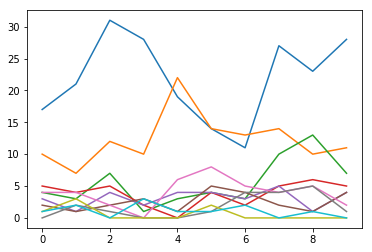

In [27]:
for values in data:
    plt.plot(values)
plt.show()

But of course it leaves something to be desired. And doesn't look quite like the original. We want a bit more control over our graph, so we'll use `subplots` to generate separate `Figure` and `Axes` objects. We can also pass a `figsize` tuple to determine the size of our graph.

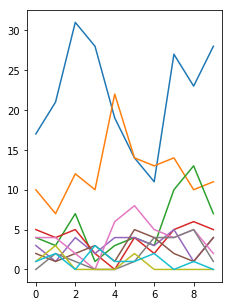

In [14]:
fig, ax = plt.subplots(figsize=(3.5, 5))
for values in data:
    ax.plot(values)
plt.show()


We can add a horizontal grid as well. The value of the `color` argument is a Hexidecimal RGB code. Other inputs are possible. `linestyle='-'` draws a solid line, but dots and dashes are possible. 

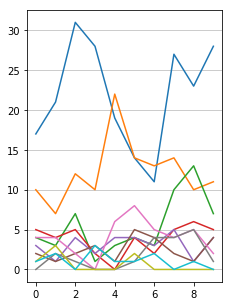

In [15]:
fig, ax = plt.subplots(figsize=(3.5, 5))
for values in data:
    ax.plot(values)
# Add a horizontal grid aligned to the major ticks
ax.yaxis.grid(which='major', color='#cccccc', linestyle='-', linewidth=1)
plt.show()

We can suppress the black edges. `plt.setp()` sets properties for objects. 

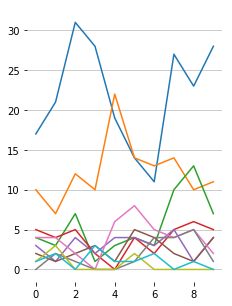

In [16]:
fig, ax = plt.subplots(figsize=(3.5, 5))
for values in data:
    ax.plot(values)
ax.yaxis.grid(which='major', color='#cccccc', linestyle='-', linewidth=1)
# Suppress the edges of the graph
plt.setp(ax.spines.values(), color=None)
plt.show()

Same for tick marks.

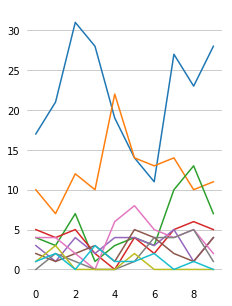

In [47]:
fig, ax = plt.subplots(figsize=(3.5, 5))
# I'm just moving the graph setup to the top of the block ...
ax.yaxis.grid(which='major', color='#cccccc', linestyle='-', linewidth=1)
plt.setp(ax.spines.values(), color=None)
# Suppress the ticks (setting color to None will not work as expected)
plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='white')
# ... and moving the plotting to the end
for values in data:
    ax.plot(values)
plt.show()

By now someone has almost certainly pointed out that the values along the x-axis are wrong.

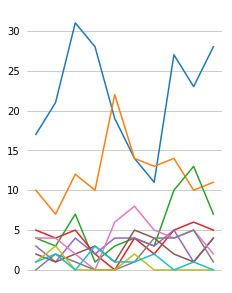

In [18]:
fig, ax = plt.subplots(figsize=(3.5, 5))
ax.yaxis.grid(which='major', color='#cccccc', linestyle='-', linewidth=1)
plt.setp(ax.spines.values(), color=None)
plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='white')
# Set values along the x-axis
plt.xticks([2005, 2014])
for values in data:
    ax.plot(values)
plt.show()

Huh?!

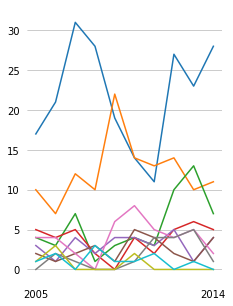

In [19]:
import numpy as np
fig, ax = plt.subplots(figsize=(3.5, 5))
ax.yaxis.grid(which='major', color='#cccccc', linestyle='-', linewidth=1)
plt.setp(ax.spines.values(), color=None)
plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='white')
plt.xticks([2005, 2014])
for i in range(len(data)):
    # Perhaps it's better to specify values along both the x- and y-axis
    ax.plot(np.arange(2005, 2015), data[i])
plt.show()


Add names

In [20]:
names = [
    'Florida', 'Australia', 'Hawai‘i', 'S Carolina', 'California & N Carolina',
    '', 'S Africa', 'Réunion Islands', 'Brazil &Bahamas', '',
]

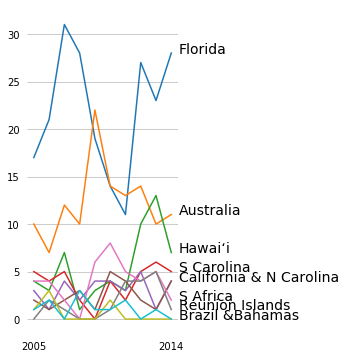

In [21]:
import numpy as np

# A slightly different, clearer but more verbose way of doing things 
fig = plt.figure(figsize=(3.5, 5))
# Specify 'margins' on all sides of the graph, to ensure
# there's room for the text labels we're adding below. This pattern
# of specifying `fig` and `ax` separately can give you more control
# when building ensembles of multiple graphs.
ax = fig.add_axes([.1, .1, 0.6, .9])
ax.yaxis.grid(which='major', color='#cccccc', linestyle='-', linewidth=1)
plt.setp(ax.spines.values(), color=None)
plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='white')
plt.xticks([2005, 2014])
for i in range(len(data)):
    ax.plot(np.arange(2005, 2015), data[i])
    # Place text to the right side of the lines, at the end of each 
    ax.text(2014.5, data[i][-1], names[i], fontsize=14)
plt.show()

And now we need to specify colors that match the original.

In [22]:
colors = [
    '#8a1513', '#c32828', '#f47c27', '#f7b815', '#cfdeee', '#cfdeee', '#5e8eca',
    '#2a5592', '#1c3666', '#1c3666',
]

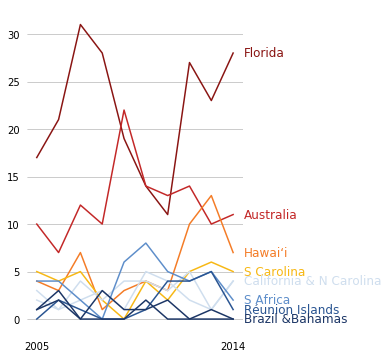

In [23]:
import numpy as np

fig = plt.figure(figsize=(5, 5))
# margins: matplotlib goes left bottom right top (start at left, counter 
# clockwise), vs. web, which starts at top and goes clockwise)
ax = fig.add_axes([.1, .1, 0.6, .9])
ax.yaxis.grid(which='major', color='#cccccc', linestyle='-', linewidth=1)
plt.setp(ax.spines.values(), color=None)
plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='white')
plt.xticks([2005, 2014])
for i in range(len(data)):
    ax.plot(np.arange(2005, 2015), data[i], color=colors[i])
    ax.text(2014.5, data[i][-1], names[i], fontsize=12, color=colors[i],
            verticalalignment='center')
plt.show()

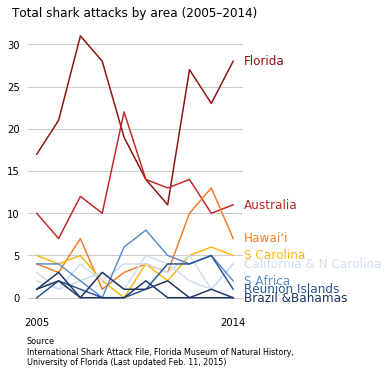

In [24]:
fig = plt.figure(figsize=(5, 5))
# Note: add more margin at top of figure to make room for a title.
ax = fig.add_axes([.1, .2, 0.6, .8])
ax.yaxis.grid(which='major', color='#cccccc', linestyle='-', linewidth=1)
plt.setp(ax.spines.values(), color=None)
plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='white')
plt.xticks([2005, 2014])
# Set the text for the title.
ax.set_title('Total shark attacks by area (2005–2014)')
# Add arbitrary text to the figure. The first two arguments determine
# the horizontal and vertical positioning of the text with respect to
# the bottom left corner of the figure.
fig.text(.1, .05, 'Source\nInternational Shark Attack File, Florida Museum '
         'of Natural History,\nUniversity of Florida '
         '(Last updated Feb. 11, 2015)', fontsize=8)
for i in range(len(data)):
    ax.plot(np.arange(2005, 2015), data[i], color=colors[i])
    ax.text(2014.5, data[i][-1], names[i], fontsize=12, color=colors[i],
            verticalalignment='center')
plt.show()

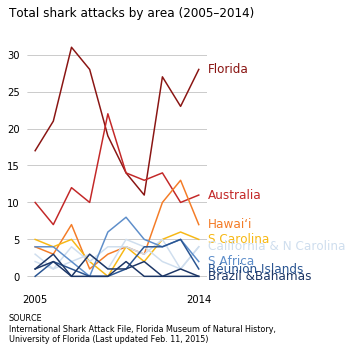

In [25]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([.1, .2, 0.5, .7])
ax.yaxis.grid(which='major', color='#cccccc', linestyle='-', linewidth=1)
plt.setp(ax.spines.values(), color=None)
plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='white')
plt.xticks([2005, 2014])
fig.suptitle('Total shark attacks by area (2005–2014)', 
             x=.05, horizontalalignment='left')
fig.text(.05, .05, 'SOURCE\nInternational Shark Attack File, '
                   'Florida Museum of Natural History,\n'
                   'University of Florida (Last updated Feb. 11, 2015)', 
         fontsize=8)
for i in range(len(data)):
    ax.plot(np.arange(2005, 2015), data[i], color=colors[i])
    ax.text(2014.5, data[i][-1], names[i], fontsize=12, color=colors[i],
            verticalalignment='center')
plt.show()

In [120]:
labels = [
    'Florida', 'Australia', 'Hawai‘i', 'S Carolina', 'California',
    'N Carolina', 'S Africa', 'Réunion Islands', 'Brazil', 'Bahamas'
]

In [144]:
sensible_colors = [
    '#8a1513', '#1db7a8', '#e08214', '#fdb863', '#799906', 
    '#ba8989', '#4556e8', '#9b25e0', '#8073ac','#542788']

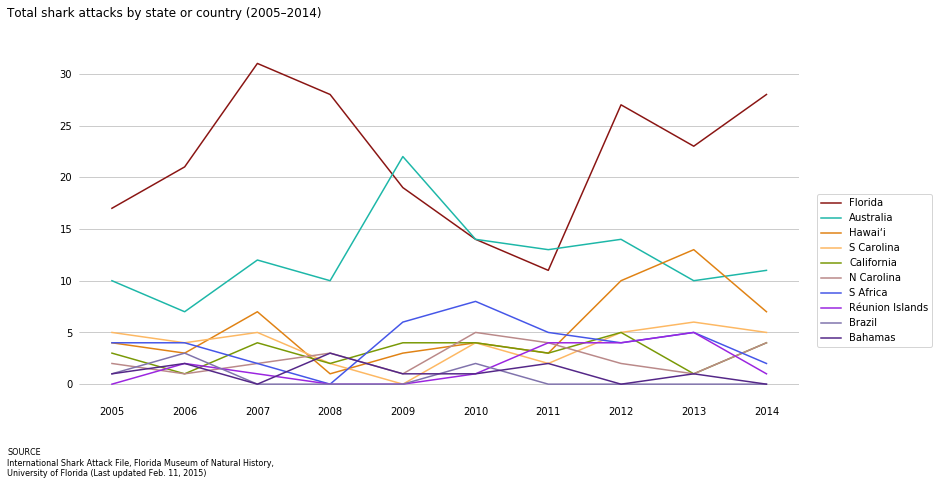

In [159]:
fig = plt.figure(figsize=(20, 7))
ax = fig.add_axes([.1, .2, 0.5, .7])
ax.yaxis.grid(which='major',  color='#cccccc', linestyle='-', linewidth=1)
plt.setp(ax.spines.values(), color=None)
plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='white')
plt.xticks(list(np.arange(2005, 2015)))
fig.suptitle('Total shark attacks by state or country (2005–2014)', 
              x=.05, horizontalalignment='left')
fig.text(.05, .05, 'SOURCE\nInternational Shark Attack File, '
                   'Florida Museum of Natural History,\n'
                   'University of Florida (Last updated Feb. 11, 2015)', 
         fontsize=8)
for i in range(len(data)):
    ax.plot(np.arange(2005, 2015), data[i], label=labels[i], color=sensible_colors[i])
#     ax.text(2014.5, data[i][-1], labels[i], fontsize=12, color=sensible_colors[i],
#             verticalalignment='center')
plt.legend(bbox_to_anchor=(1.025, 0.15), loc=3, borderaxespad=0.)
# plt.title('Total shark attacks by state or country (2005–2014)')
plt.show()
# plt.savefig('sharks.svg')

#### *Additional concerns*

May want ot normalize for number of poeple in the region, why are these regions selected and not others in the general area? Why are some included that are so far away?

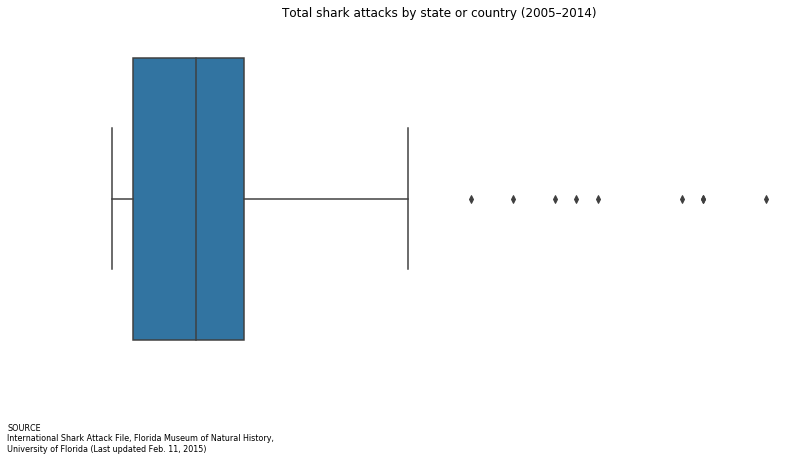

In [161]:
fig = plt.figure(figsize=(20, 7))
ax = fig.add_axes([.1, .2, 0.5, .7])
ax.yaxis.grid(which='major',  color='#cccccc', linestyle='-', linewidth=1)
plt.setp(ax.spines.values(), color=None)
plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='white')
plt.xticks(list(np.arange(2005, 2015)))
plt.title('Total shark attacks by state or country (2005–2014)')
fig.text(.05, .05, 'SOURCE\nInternational Shark Attack File, '
                   'Florida Museum of Natural History,\n'
                   'University of Florida (Last updated Feb. 11, 2015)', 
         fontsize=8)

ax = sns.boxplot(x="day", y="total_bill", data=data)
plt.show()

In [182]:
import pandas as pd
boxable = pd.DataFrame(data, columns=list(np.arange(2005,2015)), index=labels)

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Florida,17,21,31,28,19,14,11,27,23,28
Australia,10,7,12,10,22,14,13,14,10,11
Hawai‘i,4,3,7,1,3,4,3,10,13,7
S Carolina,5,4,5,2,0,4,2,5,6,5
California,3,1,4,2,4,4,3,5,1,4
N Carolina,2,1,2,3,1,5,4,2,1,4
S Africa,4,4,2,0,6,8,5,4,5,2
Réunion Islands,0,2,1,0,0,1,4,4,5,1
Brazil,1,3,0,0,0,2,0,0,0,0
Bahamas,1,2,0,3,1,1,2,0,1,0


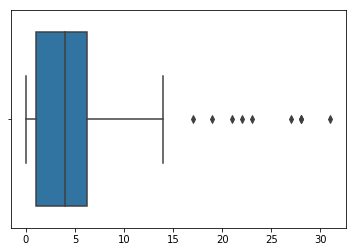